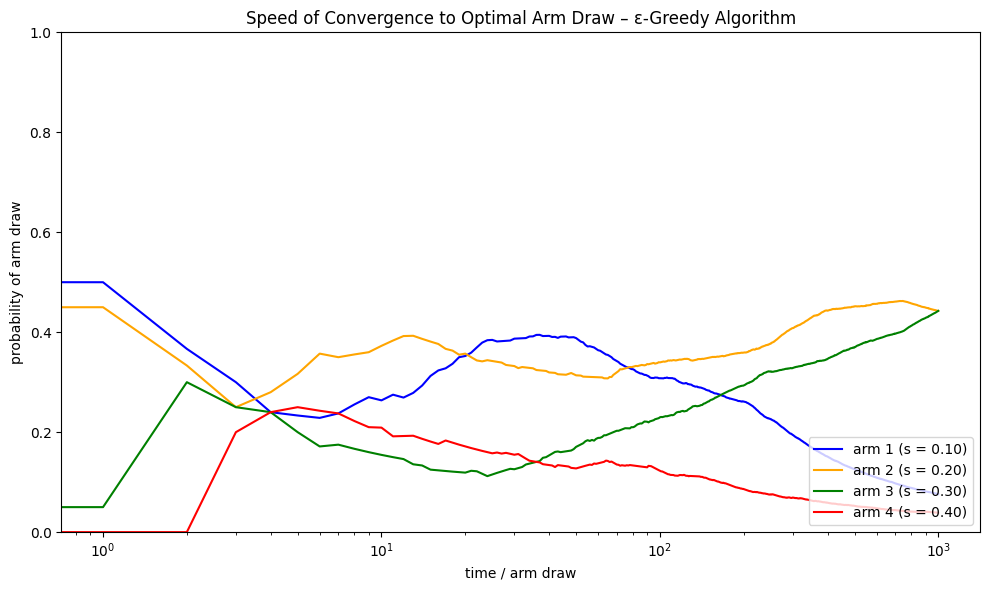

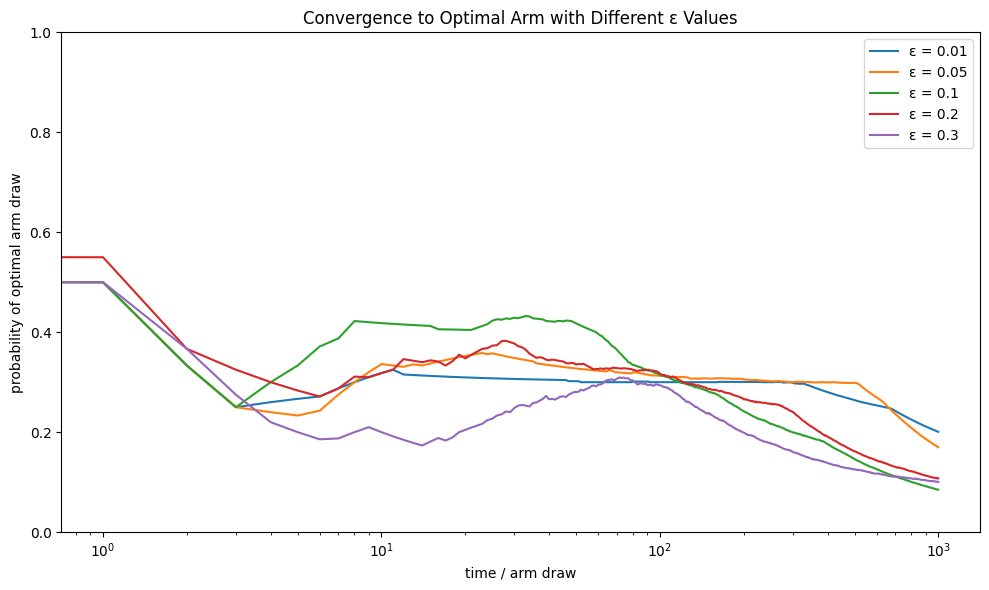

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
T = 1000
n_agents = 10
price_options = [0.1, 0.2, 0.3, 0.4]
conversion_rates = [0.9, 0.6, 0.4, 0.2]
K = len(price_options)

def get_reward(price_index):
    prob = conversion_rates[price_index]
    return price_options[price_index] if np.random.rand() < prob else 0

def simulate_epsilon_greedy(epsilon=0.1):
    counts_over_time = np.zeros((K, T))
    for agent in range(n_agents):
        n_k = np.zeros(K)
        r_k = np.zeros(K)
        
        for t in range(1, T+1):
            # ε-Greedy implementation
            if np.random.rand() < epsilon:
                # Exploration: choose randomly
                choice = np.random.choice(K)
            else:
                # Exploitation: choose best arm based on current estimates
                # For arms not yet pulled, assign high value to ensure they get pulled
                avg_rewards = np.array([r_k[k]/n_k[k] if n_k[k] > 0 else float('inf') for k in range(K)])
                choice = np.argmax(avg_rewards)
            
            reward = get_reward(choice)
            n_k[choice] += 1
            r_k[choice] += reward
            counts_over_time[choice, t-1] += 1
    
    return counts_over_time / n_agents

# Run ε-Greedy simulation
egreedy_p = np.cumsum(simulate_epsilon_greedy(epsilon=0.1), axis=1) / (np.arange(1, T+1))

# Plot ε-Greedy results
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red']

for i in range(K):
    plt.plot(egreedy_p[i], label=f'arm {i+1} (s = {price_options[i]:.2f})', color=colors[i])

plt.xscale("log")
plt.ylim(0, 1)
plt.xlabel("time / arm draw")
plt.ylabel("probability of arm draw")
plt.title("Speed of Convergence to Optimal Arm Draw – ε-Greedy Algorithm")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("egreedy_convergence.png")
plt.show()

# Explore different epsilon values
epsilons = [0.01, 0.05, 0.1, 0.2, 0.3]
egreedy_results = []

for eps in epsilons:
    result = np.cumsum(simulate_epsilon_greedy(epsilon=eps), axis=1) / (np.arange(1, T+1))
    egreedy_results.append(result)

# Plot comparison of different epsilon values (focusing on the optimal arm)
plt.figure(figsize=(10, 6))
optimal_arm = 0  # Arm with highest expected reward (price_options[0] * conversion_rates[0])

for i, eps in enumerate(epsilons):
    plt.plot(egreedy_results[i][optimal_arm], label=f'ε = {eps}')

plt.xscale("log")
plt.ylim(0, 1)
plt.xlabel("time / arm draw")
plt.ylabel("probability of optimal arm draw")
plt.title("Convergence to Optimal Arm with Different ε Values")
plt.legend()
plt.tight_layout()
plt.savefig("egreedy_epsilon_comparison.png")
plt.show()